# Linear Regression Health Costs Calculator

---
In this challenge, I have to build a linear regression model to predict healthcare costs from he given dataset which contains information about people and their healthcare costs.



> - This project represents a submission for the "[Machine Learning with Python](https://www.freecodecamp.org/learn/machine-learning-with-python/#how-neural-networks-work)" course by freeCodeCamp.


> - The "Linear Regression Health Costs Calculator" challenge link is [here](https://www.freecodecamp.org/learn/machine-learning-with-python/machine-learning-with-python-projects/linear-regression-health-costs-calculator).


```
Nattawut Chamcheun (Friend)
Date: 28-08-2023
```

# Preparation

In [1]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2023-08-28 11:03:12--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 172.67.70.149, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.1’

insurance.csv.1     100%[===================>]  49.09K  --.-KB/s    in 0.001s  

2023-08-28 11:03:12 (90.3 MB/s) - ‘insurance.csv.1’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [3]:
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


# Data Transformation

In [4]:
## See overall information of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
## Check unique values in each category column

cat_columns=['sex', 'smoker', 'region']

for i in range(len(cat_columns)):
  print( f"{cat_columns[i]}: {dataset[cat_columns[i]].unique()}" )

sex: ['female' 'male']
smoker: ['yes' 'no']
region: ['southwest' 'southeast' 'northwest' 'northeast']


### Apply One-Hot Encoding

In [6]:
## Apply one-hot encoding to categorical columns

one_hotted_df = pd.get_dummies(dataset, columns = ['sex', 'smoker', 'region'])
one_hotted_df

,age,bmi,children,expenses,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,1,0,0,1,0,0,0,1
1,18,33.8,1,1725.55,0,1,1,0,0,0,1,0
2,28,33.0,3,4449.46,0,1,1,0,0,0,1,0
3,33,22.7,0,21984.47,0,1,1,0,0,1,0,0
4,32,28.9,0,3866.86,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,0,1,1,0,0,1,0,0
1334,18,31.9,0,2205.98,1,0,1,0,1,0,0,0
1335,18,36.9,0,1629.83,1,0,1,0,0,0,1,0
1336,21,25.8,0,2007.95,1,0,1,0,0,0,0,1


### Split to train and test datasets

In [7]:
one_hotted_columns = one_hotted_df.columns.values.tolist()
one_hotted_columns

['age',
 'bmi',
 'children',
 'expenses',
 'sex_female',
 'sex_male',
 'smoker_no',
 'smoker_yes',
 'region_northeast',
 'region_northwest',
 'region_southeast',
 'region_southwest']

In [8]:
## Separate features and labels
one_hotted_columns.pop(one_hotted_columns.index('expenses'))
features = one_hotted_columns
X = one_hotted_df.loc[:, features]
y = one_hotted_df.loc[:, ['expenses']]

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = .8)

In [10]:
## Check out separated datasets

X_train.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,20.0,2,1,0,1,0,0,1,0,0
1285,47,24.3,0,1,0,1,0,1,0,0,0
1142,52,24.9,0,1,0,1,0,0,0,1,0
969,39,34.3,5,1,0,1,0,0,0,1,0
486,54,21.5,3,1,0,1,0,0,1,0,0


In [11]:
y_train.head()

,expenses
560,9193.84
1285,8534.67
1142,27117.99
969,8596.83
486,12475.35


In [12]:
X_test.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
764,45,25.2,2,1,0,1,0,1,0,0,0
887,36,30.0,0,1,0,1,0,0,1,0,0
890,64,26.9,0,1,0,0,1,0,1,0,0
1293,46,25.7,3,0,1,1,0,0,1,0,0
259,19,31.9,0,0,1,0,1,0,1,0,0


In [13]:
y_test.head()

,expenses
764,9095.07
887,5272.18
890,29330.98
1293,9301.89
259,33750.29


# Modeling

In [14]:
## Build the tensorflow model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

Since purpose of this challenge is to optimize MAE of `expenses`, we will define `metrics` as `mae`.

In [15]:
## Define loss, optimizer, and metrics

model.compile(loss = tf.keras.losses.mean_absolute_error,
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=['mae'])

In [16]:
## Fit the model

num_epochs = 100
batch_size = 32

history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size)

Epoch 1/100
34/34 [==============================] - 1s 5ms/step - loss: 13216.3369 - mae: 13216.3369
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 12116.5596 - mae: 12116.5596
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 8724.6846 - mae: 8724.6846
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7459.6514 - mae: 7459.6514
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7408.6841 - mae: 7408.6841
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7338.1802 - mae: 7338.1802
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7279.9429 - mae: 7279.9429
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7222.8574 - mae: 7222.8574
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7167.8979 - mae: 7167.8979
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7099.8340 - mae: 7099.

In [17]:
## See the result (MAE)
loss = model.evaluate(X_test, y_test)
print("Test loss (MAE):", loss)

9/9 [==============================] - 0s 3ms/step - loss: 2431.7463 - mae: 2431.7463
Test loss (MAE): [2431.746337890625, 2431.746337890625]


# Submission

In [18]:
train_dataset = X_train
test_dataset = X_test
train_labels = y_train
test_labels = y_test

9/9 - 0s - loss: 2431.7463 - mae: 2431.7463 - 50ms/epoch - 6ms/step
Testing set Mean Abs Error: 2431.75 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 2ms/step


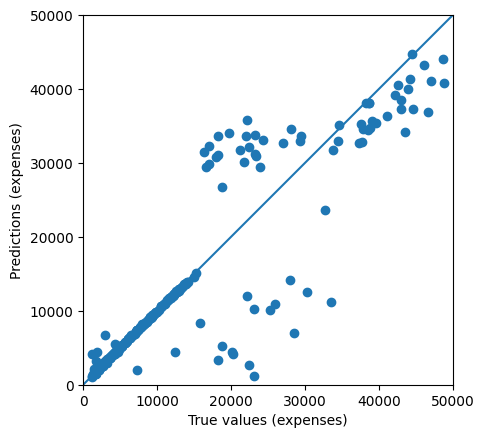

In [19]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
